## Import library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

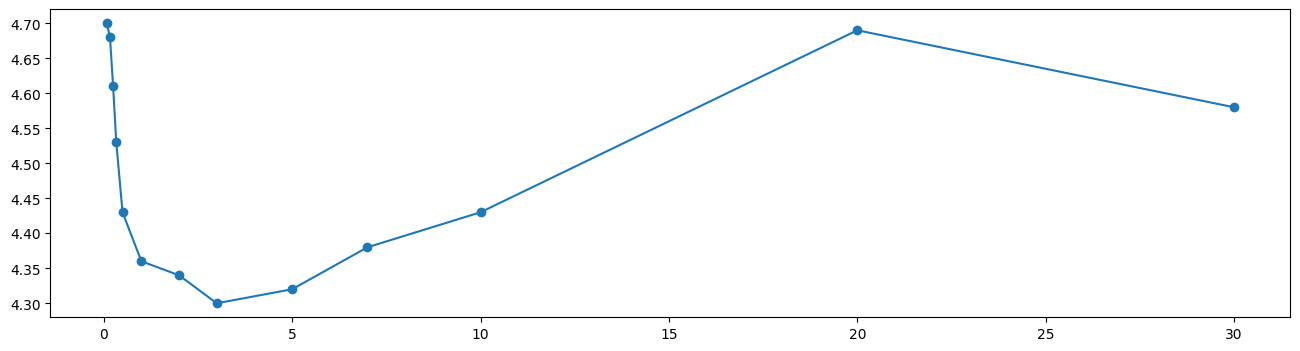

In [30]:
def treasury_data_retrieval():
    df = pd.read_csv('../data/us_treasury_rates.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values(by='Date', ascending=False)

    return df

id = 15
df = treasury_data_retrieval()

row = df.iloc[id, 1:].values
header = [1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

plt.figure(figsize=(16, 4))
plt.plot(header, row, marker='o')

## Flatten data

In [79]:
n = len(df)
h = 3

flatten = pd.DataFrame()
for id in range(1, n):
    row = df.iloc[id:(id+h), 1:].stack().reset_index(drop=True).to_frame().T
    flatten = pd.concat([flatten, row], ignore_index=True)
flatten['y'] = df.iloc[:(n-1), 1]
flatten.dropna(inplace=True)
flatten.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,y
0,4.59,4.53,4.46,4.46,4.38,4.23,4.15,4.10,4.07,4.12,...,4.40,4.27,4.17,4.13,4.11,4.17,4.23,4.50,4.40,4.57
1,4.65,4.54,4.47,4.46,4.38,4.23,4.13,4.09,4.07,4.13,...,4.43,4.30,4.17,4.11,4.08,4.13,4.19,4.46,4.36,4.59
2,4.66,4.56,4.49,4.48,4.40,4.27,4.17,4.13,4.11,4.17,...,4.42,4.30,4.13,4.10,4.05,4.10,4.18,4.45,4.36,4.65
3,4.75,4.63,4.51,4.51,4.43,4.30,4.17,4.11,4.08,4.13,...,4.43,4.34,4.19,4.17,4.11,4.17,4.25,4.52,4.44,4.66
4,4.76,4.69,4.58,4.52,4.42,4.30,4.13,4.10,4.05,4.10,...,4.45,4.37,4.21,4.21,4.17,4.24,4.30,4.56,4.48,4.75


## Trial models

In [74]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X, y = flatten.drop(columns='y'), flatten['y']
cv = 10

In [71]:
# Linear Regression
model = LinearRegression()
mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Average Mean Squared Error (MSE):", -mse_scores.mean())  # Negating the average MSE
print("Average R-squared (R²):", r2_scores.mean())


Average Mean Squared Error (MSE): 0.00827068884981019
Average R-squared (R²): -0.10277300007581607


In [78]:
# Ridge Regression
model = Ridge(alpha=0.1) 

mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Average Mean Squared Error (MSE):", -mse_scores.mean())  # Negating the average MSE
print("Average R-squared (R²):", r2_scores.mean())

Average Mean Squared Error (MSE): 0.007942478186255384
Average R-squared (R²): 0.24253091136100008


In [72]:
# Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Average Mean Squared Error (MSE):", -mse_scores.mean())  # Negating the average MSE
print("Average R-squared (R²):", r2_scores.mean())


Average Mean Squared Error (MSE): 0.019788450759608528
Average R-squared (R²): -0.08082590695803901


In [80]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

print("Average Mean Squared Error (MSE):", -mse_scores.mean())  # Negating the average MSE
print("Average R-squared (R²):", r2_scores.mean())


Average Mean Squared Error (MSE): 0.01957703070192899
Average R-squared (R²): -3.953739419539867
